<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n250.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,69.771612,29.267390,65.338361,42.723478,0.036935,217.137776,217.102571,0.035205
1,0.0,1.0,61.918568,75.500837,66.001679,34.462853,0.017634,247.901570,247.880443,0.021127
2,0.0,2.0,63.533535,98.646691,94.079360,36.339632,-0.016992,302.582226,302.599868,-0.017642
3,0.0,3.0,31.392138,94.664979,93.095865,51.638070,-0.029810,280.761242,280.794386,-0.033144
4,0.0,4.0,51.015181,40.120469,87.925887,53.894242,-0.018403,242.937376,242.963384,-0.026009
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,71.738323,49.784338,46.236463,26.189755,0.044245,203.993125,203.962427,0.030698
119996,999.0,116.0,59.063562,21.730099,34.013157,26.378294,0.108749,151.293862,151.211789,0.082073
119997,999.0,117.0,20.666260,26.621024,93.184517,54.719456,0.041095,205.232352,205.202397,0.029955
119998,999.0,118.0,80.135033,47.990225,35.655982,78.102467,0.116076,251.999783,251.905448,0.094335


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,69.771612,29.267390,65.338361,42.723478,0.036935,217.137776,217.102571,0.035205
1,0.0,1.0,61.918568,75.500837,66.001679,34.462853,0.017634,247.901570,247.880443,0.021127
2,0.0,2.0,63.533535,98.646691,94.079360,36.339632,-0.016992,302.582226,302.599868,-0.017642
3,0.0,3.0,31.392138,94.664979,93.095865,51.638070,-0.029810,280.761242,280.794386,-0.033144
4,0.0,4.0,51.015181,40.120469,87.925887,53.894242,-0.018403,242.937376,242.963384,-0.026009
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,71.738323,49.784338,46.236463,26.189755,0.044245,203.993125,203.962427,0.030698
119996,999.0,116.0,59.063562,21.730099,34.013157,26.378294,0.108749,151.293862,151.211789,0.082073
119997,999.0,117.0,20.666260,26.621024,93.184517,54.719456,0.041095,205.232352,205.202397,0.029955
119998,999.0,118.0,80.135033,47.990225,35.655982,78.102467,0.116076,251.999783,251.905448,0.094335


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    69.771612  29.267390  65.338361  42.723478  0.036935  217.137776   
      1.0    61.918568  75.500837  66.001679  34.462853  0.017634  247.901570   
      2.0    63.533535  98.646691  94.079360  36.339632 -0.016992  302.582226   
      3.0    31.392138  94.664979  93.095865  51.638070 -0.029810  280.761242   
      4.0    51.015181  40.120469  87.925887  53.894242 -0.018403  242.937376   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  71.738323  49.784338  46.236463  26.189755  0.044245  203.993125   
      116.0  59.063562  21.730099  34.013157  26.378294  0.108749  151.293862   
      117.0  20.666260  26.621024  93.184517  54.719456  0.041095  205.232352   
      118.0  80.135033  47.990225  35.655982  78.102467  0.116076  251.999783   
      119.0  25.319338  78.752653  39.644411  22.781690  0.035180  176.533272   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    217.102571  0.035205  
      1.0    247.880443  0.021127  
      2.0    302.599868 -0.017642  
      3.0    280.794386 -0.033144  
      4.0    242.963384 -0.026009  
...                 ...       ...  
999.0 115.0  203.962427  0.030698  
      116.0  151.211789  0.082073  
      117.0  205.202397  0.029955  
      118.0  251.905448  0.094335  
      119.0  176.504616  0.028656  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    69.771612  29.267390  65.338361  42.723478  0.036935  217.137776   
      1.0    61.918568  75.500837  66.001679  34.462853  0.017634  247.901570   
      2.0    63.533535  98.646691  94.079360  36.339632 -0.016992  302.582226   
      3.0    31.392138  94.664979  93.095865  51.638070 -0.029810  280.761242   
      4.0    51.015181  40.120469  87.925887  53.894242 -0.018403  242.937376   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  71.738323  49.784338  46.236463  26.189755  0.044245  203.993125   
      116.0  59.063562  21.730099  34.013157  26.378294  0.108749  151.293862   
      117.0  20.666260  26.621024  93.184517  54.719456  0.041095  205.232352   
      118.0  80.135033  47.990225  35.655982  78.102467  0.116076  251.999783   
      119.0  25.319338  78.752653  39.644411  22.781690  0.035180  176.533272   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    217.102571  0.035205  
      1.0    247.880443  0.021127  
      2.0    302.599868 -0.017642  
      3.0    280.794386 -0.033144  
      4.0    242.963384 -0.026009  
...                 ...       ...  
999.0 115.0  203.962427  0.030698  
      116.0  151.211789  0.082073  
      117.0  205.202397  0.029955  
      118.0  251.905448  0.094335  
      119.0  176.504616  0.028656  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,69.771612,29.267390,65.338361,42.723478,0.036935,217.137776,217.102571,0.035205
1,0.0,1.0,61.918568,75.500837,66.001679,34.462853,0.017634,247.901570,247.880443,0.021127
2,0.0,2.0,63.533535,98.646691,94.079360,36.339632,-0.016992,302.582226,302.599868,-0.017642
3,0.0,3.0,31.392138,94.664979,93.095865,51.638070,-0.029810,280.761242,280.794386,-0.033144
4,0.0,4.0,51.015181,40.120469,87.925887,53.894242,-0.018403,242.937376,242.963384,-0.026009
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,71.738323,49.784338,46.236463,26.189755,0.044245,203.993125,203.962427,0.030698
119996,999.0,116.0,59.063562,21.730099,34.013157,26.378294,0.108749,151.293862,151.211789,0.082073
119997,999.0,117.0,20.666260,26.621024,93.184517,54.719456,0.041095,205.232352,205.202397,0.029955
119998,999.0,118.0,80.135033,47.990225,35.655982,78.102467,0.116076,251.999783,251.905448,0.094335


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    69.771612  29.267390  65.338361  42.723478  0.036935  217.137776   
      1.0    61.918568  75.500837  66.001679  34.462853  0.017634  247.901570   
      2.0    63.533535  98.646691  94.079360  36.339632 -0.016992  302.582226   
      3.0    31.392138  94.664979  93.095865  51.638070 -0.029810  280.761242   
      4.0    51.015181  40.120469  87.925887  53.894242 -0.018403  242.937376   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  71.738323  49.784338  46.236463  26.189755  0.044245  203.993125   
      116.0  59.063562  21.730099  34.013157  26.378294  0.108749  151.293862   
      117.0  20.666260  26.621024  93.184517  54.719456  0.041095  205.232352   
      118.0  80.135033  47.990225  35.655982  78.102467  0.116076  251.999783   
      119.0  25.319338  78.752653  39.644411  22.781690  0.035180  176.533272   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    217.102571  0.035205  
      1.0    247.880443  0.021127  
      2.0    302.599868 -0.017642  
      3.0    280.794386 -0.033144  
      4.0    242.963384 -0.026009  
...                 ...       ...  
999.0 115.0  203.962427  0.030698  
      116.0  151.211789  0.082073  
      117.0  205.202397  0.029955  
      118.0  251.905448  0.094335  
      119.0  176.504616  0.028656  

[120000 rows x 8 columns]

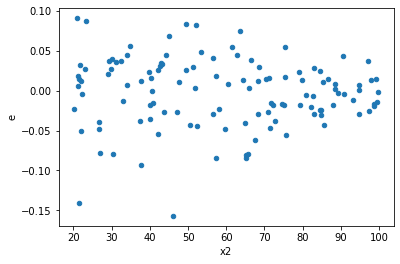

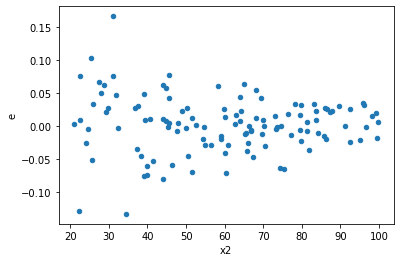

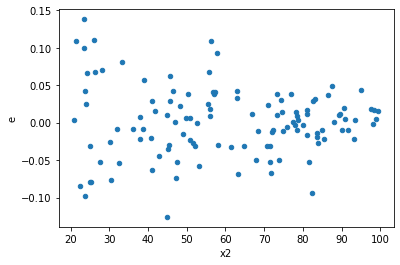

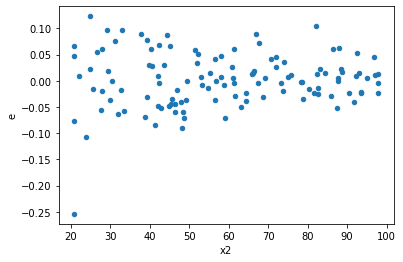

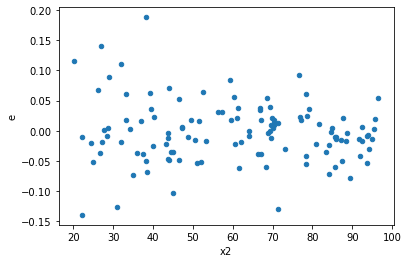

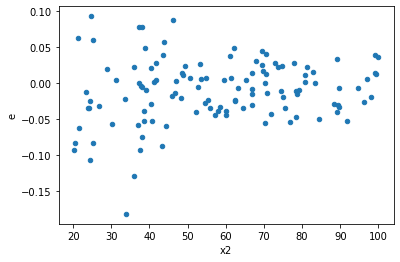

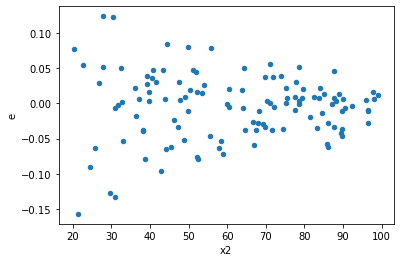

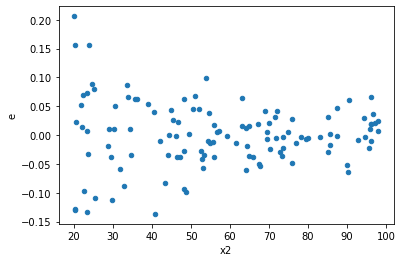

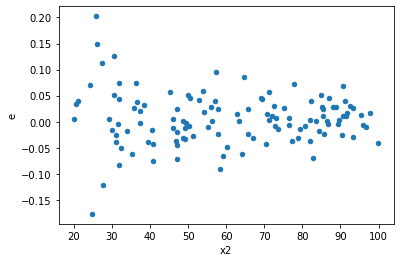

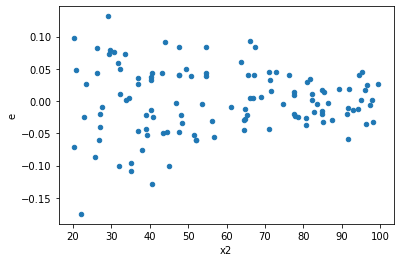

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,44.0,44.0,0.08172258027836948,0.08988183084645769,0.0018573313699629427,0.0020427688828740386,1.0998408339567298,0.7536872093395854,0.6231563953302073,0.3768436046697927,Reject001=1 : Homoscedasticity
12.0,44.0,44.0,0.09976541916277556,0.11177882628009587,0.002267395890063081,0.002540427870002179,1.1204165453133559,0.7077606473258369,0.6461196763370816,0.35388032366291844,Reject001=1 : Homoscedasticity
38.0,44.0,44.0,0.05647667851108656,0.07264607589371189,0.0012835608752519673,0.0016510471794025428,1.2863022013493803,0.4069827977299565,0.7965086011350218,0.20349139886497825,Reject001=1 : Homoscedasticity
72.0,44.0,44.0,0.06832792286204392,0.0816915246794683,0.0015529073377737255,0.0018566255608970068,1.1955803902367395,0.5560562098834816,0.7219718950582592,0.2780281049417408,Reject001=1 : Homoscedasticity
92.0,44.0,44.0,0.0750717674424082,0.20197247302873192,0.0017061765327820047,0.004590283477925726,2.690391873132285,0.0013694105139125945,0.9993152947430437,0.0006847052569562972,Reject001=0 : Heteroscedasticity
101.0,44.0,44.0,0.07375226833123028,0.08524531758350243,0.00167618791661887,0.001937393581443237,1.155833162997177,0.6330844198329033,0.6834577900835483,0.31654220991645166,Reject001=1 : Homoscedasticity
102.0,44.0,44.0,0.06893275166932478,0.07579473605331527,0.0015666534470301086,0.001722607637575347,1.0995460679838795,0.7543583464861372,0.6228208267569314,0.3771791732430686,Reject001=1 : Homoscedasticity
139.0,44.0,44.0,0.08711861130786214,0.10424742173392204,0.0019799684388150485,0.0023692595848618645,1.196614823961434,0.5541480336874405,0.7229259831562798,0.27707401684372024,Reject001=1 : Homoscedasticity
207.0,44.0,44.0,0.07289156250688586,0.08061748817223047,0.0016566264206110423,0.001832215640277965,1.1059920435182709,0.7397661305789724,0.6301169347105138,0.3698830652894862,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,0.08172258027836948,0.08988183084645769,0.0018573313699629427,0.0020427688828740386,1.0998408339567298,0.7536872093395854,Reject001=1 : Homoscedasticity
1.0,44.0,44.0,0.1039364651527768,0.05014475458899473,0.0023621923898358363,0.001139653513386244,0.4824558398757036,0.01740722561174077,Reject001=1 : Homoscedasticity
2.0,44.0,44.0,0.11968598952029888,0.049250327505915306,0.002720136125461338,0.0011193256251344388,0.4114961801570133,0.003945125550385958,Reject001=0 : Heteroscedasticity
3.0,44.0,44.0,0.17757450865691987,0.06332721584316514,0.00403578428765727,0.0014392549055264805,0.35662334826174585,0.0008696831955153143,Reject001=0 : Heteroscedasticity
4.0,44.0,44.0,0.12530189622619115,0.10858169340468399,0.0028477703687770713,0.002467765759197363,0.8665606561027268,0.6368368684073095,Reject001=1 : Homoscedasticity
5.0,44.0,44.0,0.09730465764603845,0.030147339452918816,0.0022114694919554193,0.0006851668057481549,0.309824217896996,0.00016849686258884006,Reject001=0 : Heteroscedasticity
6.0,44.0,44.0,0.11890242121116415,0.06293061621820657,0.0027023277547991854,0.001430241277686513,0.5292626977414132,0.03742396170647607,Reject001=1 : Homoscedasticity
7.0,44.0,44.0,0.236887615066929,0.058933112321575276,0.005383809433339296,0.001339388916399438,0.24878089259721162,9.795359789457928e-06,Reject001=0 : Heteroscedasticity
8.0,44.0,44.0,0.1300335409142295,0.04915585655168359,0.0029553077480506704,0.001117178557992809,0.3780244405103676,0.0016417928108888576,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      599
Reject001=0 : Heteroscedasticity    401
Name: Result_test, dtype: int64